### Overview  <a name='objectives' />

This notebook introduces you to Logistic Regression, Decision Theory, and Basic Classifiers. 

The topics that will be covered are:

*  <a href=#log_regression>Understanding Logistic Regression</a>
*  <a href=#naive_bayes>Naive Bayes Classifier</a>

You will need to implement code between the comments:

`# Your code starts here` and `# Your code ends here`


In [0]:
# Make sure that the required libraries are installed
# If you are using Google Colab, remember to upload the requirements file before 
# running this cell
# If you are running this notebook locally, the requirements file needs to be in 
# the same location as this notebook
import sys
!{sys.executable} -m pip install -r requirements_week03.txt

### Understanding Logistic Regression <a name='log_regression' />

#### Binary logistic regression - Assumptions

*    The dependent variable is binary

*    The factor level 1 of the dependent variable represents the desired outcome

*    Only the meaningful variables should be included

*    The independent variables should be independent of each other

*    The independent variables are linearly related to the odds, where
$\text{odds}(x) = \text{ln} \frac{p(x)}{1-p(x)}$

*    In general, logistic regression requires quite large sample sizes

#### Logistic regression on a real dataset

 We will use the Boston housing dataset. The Boston housing dataset was collected in $1978$ and each of the $506$ entries represent aggregated data about $14$ features for homes from various suburbs in Boston, Massachusetts.

There are 14 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town 
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms among homes in the neighborhood
7. AGE - proportion of owner-occupied units built prior to $1940$
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$ $10.000$
11. PTRATIO - pupil-teacher ratio by town
12. B - $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
13. LSTAT - \% lower status of the population
14. MEDV - Median value of owner-occupied homes in \$ $1000$'s 

Only $2$ features are used in this exercise in order to visualize the data and the decision boundary in a 2D plot. The features 'RM' and 'CRIM' are most discriminative and were chosen as the input features of our regression model. The 'MEDV' feature is the continuous ```'target'``` or observed output. 

#### Load, split, and visualize the data

<a href=#objectives> [go to top] </a>


# New Section

In [0]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# From sklearn import ...
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train.shape: (354, 2)
Y_train.shape: (354,)
X_test.shape: (152, 2)
Y_test.shape: (152,)


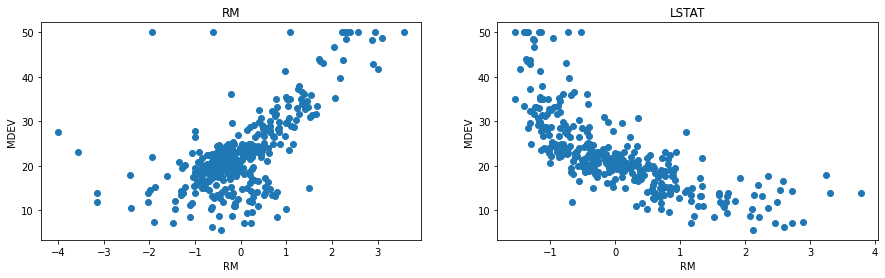

In [0]:
# Load the Boston dataset (which is a python dictionary)
boston_dataset = load_boston()

# Fetch the desired columns and process the data
Y = boston_dataset['target']

# Select the 'RM' and 'LSTAT' columns from the dataset
used_features = ['RM', 'LSTAT']
data_col = list()
for col, val in enumerate(boston_dataset['feature_names']):
    if(val in used_features):
        data_col.append(col)

X = boston_dataset['data'][:,data_col]

# Split into train and test sets
random_seed = np.random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

# Center and normalize the train data to have 0 mean and 1 standard deviation
scaler  = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Scale the test data in the same way as the train data
X_test = scaler.transform(X_test) 

# Printing shape of data
print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('Y_test.shape: {}'.format(Y_test.shape))

# Visualize each feature dimension in the training set
plt.figure(figsize=(15, 4))
for i in range(X_train.shape[1]):
    plt.subplot(1, X_train.shape[1], i+1)
    plt.plot(X_train[:,i], Y_train, 'o');
    plt.title(used_features[i])
    plt.xlabel(used_features[0])
    plt.ylabel('MDEV')

#### Make the observations binary 

* Use \$ $20K$ as threshold
* Visualize the data using a 2D plot

In [0]:
# Plot a figure where the axes are 'RM' and 'LSTAT'
def plot_data(x, y, x_label = 'RM', y_label = 'LSTAT', high_label='>20', low_label='<20'):
    # Separating positive and negative scores (in this case 1 and 0 values):
    pos = y == 1
    neg = y == 0
    
    # Scatter plotting the data, filtering them according the pos/neg values
    plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkgreen', marker='+', label=high_label)
    plt.scatter(x[neg, 0], x[neg, 1], s=30, c='red', marker='o', label=low_label)

    # Labels and limits
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x[:, 0].min(), x[:, 0].max())
    plt.ylim(x[:, 1].min(), x[:, 1].max())

    # Legend
    pst = plt.legend(loc='upper right', frameon=True)
    pst.get_frame().set_edgecolor('k')

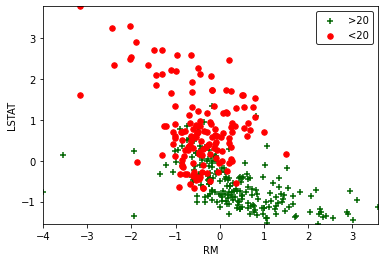

In [0]:
mdev_threshold = 20.

Y_train_bin = np.copy(Y_train)
Y_train_bin[Y_train > mdev_threshold] = 1
Y_train_bin[Y_train <= mdev_threshold] = 0

Y_test_bin = np.copy(Y_test)
Y_test_bin[Y_test > mdev_threshold] = 1
Y_test_bin[Y_test <= mdev_threshold] = 0

plot_data(X_train, Y_train_bin, x_label = used_features[0], y_label = used_features[1])

#### The sigmoid function

Logistic regression model is defined as $f(\mathbf{x}) = \sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x})$, where $\sigma(\cdot)$ is the sigmoid function defined as $\sigma(z) = \frac{1}{1-e^{-z}}$. Implement the sigmoid function and plot its graph between $[-10,\,10]$.

In [0]:
# Defining sigmoid function:
def sigmoid(z):
    # Your code starts here
    
    # Your code ends here

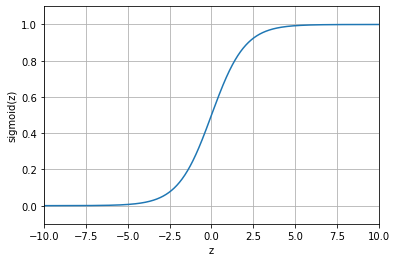

In [0]:
# Compute the sigmoid in the interval [-10,10] 
z_val = np.linspace(-10, 10, 1000)

# Plot the sigmoid's graph
plt.plot(z_val, sigmoid(z_val))
plt.grid(True)

# Labels and limits
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.xlim(z_val.min(), z_val.max())
plt.ylim(-0.1, 1.1);

#### Define the loss function and derive its gradient

In [0]:
# Implement the two functions in this block

def loss_function(w, x, y):
    # Your code starts here


    # Your code ends here
    
    return J


def loss_function_gradient(w, x, y):
    # Your code starts here

    
    # Your code ends here
    
    return gradient

Add an extra column to the input data and set it to one.

Initialize the learning parameters to zero.

Test the functions ```loss_function``` and  ```loss_function_gradient``` on the test data ```X_test_bin``` and ```Y_test```.

**Hint:** The loss should be around ```0.693``` 

In [0]:
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))

w = np.zeros(X_test.shape[1])

J = loss_function(w, X_test, Y_test)
gradient = loss_function_gradient(w, X_test, Y_test_bin)

# We should see that the cost is about xxx
print("Cost: %0.3f"%(J))
print("Gradient: {0}".format(gradient))



Cost: 0.693
Gradient: [-0.05921053 -0.23440022  0.38680731]


#### Calculate the logistic regression parameters using the Batch Gradient Descent algorithm

Update rule: $w(j+1) := w(j) - \frac{\alpha}{n} \sum^{n}_{i=1} (\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x})-y_i)x_{ij}$


In [0]:
def batch_gradient_descent(x, y, alpha, num_steps):
    """
    Implementation of the gradient descent algorithm for logistic regression
    
    :param: x: Training input data of shape (N,D)
    :param: y: Training target labels of shape (N,1)
    :param: alpha: Scalar learning rate
    :param: num_steps: Number of gradient descent steps
    :returns: weight vector 'w' and list of 'losses' (loss in each step)
    """
    # Your code starts here

    # Your code ends here

    return w, losses

#### Compute the parameters of the logistic regression model

In [0]:
# Your code starts here

# Your code ends here

batch_gradient_descent: initial parameters [-1.27750316  0.81749659  0.6186039 ]
batch_gradient_descent: learned parameters [ 0.4638813   0.61855819 -2.427379  ]


Let's plot the losses in a graph where the x-axis shows the $\log_{10}$ of the step number and the y-axis shows the training loss.

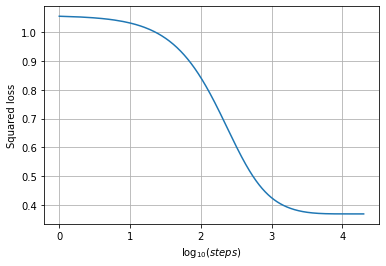

In [0]:
# Your code starts here

# Your code ends here

#### Evaluate the logistic regression model

After calculating the parameters, we can use the model to make predictions:
1. Calculate and plot the decision boundary
2. Evaluate the accuracy on training and test sets
3. Predict the outcome (MDEV smaller or bigger than 20) for ```(3, 0.5)``` 

Training Accuracy of the classifier: 83.05084745762711%
Testing Accuracy of the classifier: 89.47368421052632%
Predicition at (3,0.5): >20


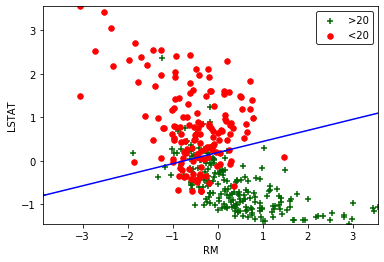

In [0]:
def predict(w, x):
    # Your code starts here

    # Your code ends here
    
    return np.array(predictions)

# Calculating x and y for the decision boundary
plot_x = np.array([np.min(X_train[:, 1])-1, np.max(X_train[:, 1])+1])

# From the decision boundary calculations x2 = (-1 / w2) * (w1 * x1 + w0)
plot_y = (-1 / w_star[2]) * (w_star[1] * plot_x + w_star[0])
#plt.scatter(45, 85, s=30, c='r', marker='x', label='Ex.1 - 45, Ex.2 - 85')

# Plotting the data
plot_data(X_train[:,1:], Y_train_bin, x_label = used_features[0], y_label = used_features[1])
plt.plot(plot_x, plot_y, c='b');

# Training accuracy
# Prediction using calculated values of w and given data set
p = predict(w_star, X_train)
print('Training Accuracy of the classifier: {0}%'.format(np.sum(p==Y_train_bin) / p.size * 100))

# Testing accuracy
# Prediction using calculated values of w and given data set
p = predict(w_star, X_test)
print('Testing Accuracy of the classifier: {0}%'.format(np.sum(p==Y_test_bin) / p.size * 100))

p = predict(w_star, np.array([[1,3,0.5]]))
print('Predicition at (3,0.5): {0}'.format('<20' if p==0 else '>20'))

### Naive Bayes Classifier <a name='naive_bayes' />

**Naive Bayes** is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

More in details, the standard **Bayes classifier** tries to extimate

$$
\begin{align}
p(Y|X) = \frac{p(X,Y)}{p(X)} 
\end{align}
$$

using maximum likelihood estimation.

The **Naive Bayes classifier** exploits the Bayes rule and the conditional independendence ('naive') assumption.

$$
\begin{align}
p(Y|X) = \frac{p(X,Y)}{p(X)} = \frac{p(X|Y)p(Y)}{p(X)} \text{ (Bayes rule)} 
\end{align}
$$

Estimating $p(Y)$ is easy in a discrete case. Estimating $p(X|Y)$ for $X=\{x_1,x_2,\ldots,x_m\}$ requires the naive assumption:

$$
\begin{align}
p(X|Y) &= p(x_1|Y)p(x_2|Y,x_1)p(x_3|Y,x_1,x_2) \cdots p(x_m|Y,x_1,x_2,\ldots,x_{m-1} ) &\text{chain rule of probability}\\ 
& = p(x_1|Y)p(x_2|Y)\cdots p(x_m|Y) &\text{conditional independence (naive)}\\
& = \prod_{i=1}^m p(x_i|Y)
\end{align}
$$

As for the **Bayes classifier**, the **Naive Bayes classifier** predicts the class for which the posterior probability is the greatest:

$$
\begin{align}
g(X) &= \text{argmax}_Y p(Y|X) \\ 
& = \text{argmax}_Y \frac{p(X|Y)p(Y)}{p(X)}\\
& = \text{argmax}_Y p(X|Y)p(Y) &p(X) \text{ does not depend on } Y\\
& = \text{argmax}_Y \prod_{i=1}^m p(x_i|Y)p(Y) &\text{Naive assumption}\\
& = \text{argmax}_Y \sum_{i=1}^m \log{p(x_i|Y)} + \log{p(Y)} &\text{Log is monotonic, numerically stable}
\end{align}
$$

We assume that $p(x_i|Y = c) \sim ~\mathcal{N}(\mu_{ic},\sigma_{ic}^2)$ and estimate the parameters from training data.

#### Naive Bayes classifier on a real dataset

We will use the 'iris' dataset. There are 5 attributes in each case of the dataset. They are:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class (```target```): Iris Setosa, Iris Versicolour, and Iris Virginica

Only $2$ features are used in this exercise in order to visualize the data and the decision boundary in a 2D plot. The features 'Sepal length in cm' and 'Petal length in cm' are chosen as the input features of our regression model. The 'Class' feature is the continuous ```'target'``` or observed output. 

#### Load, split, and visualize  the data

<a href=#objectives> [go to top] </a>

In [0]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# From sklearn import ...
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
def plot_iris_dataset(X, Y, x_label = 'sepal length (cm)', y_label = 'sepal width (cm)'):
    # Split the 3 classes
    setosa_indx = Y == 0
    versicolour_indx = Y == 1
    virginica_indx = Y == 2

    # Scatter plotting the data, filtering them according the pos/neg values
    plt.scatter(X[setosa_indx, 0], X[setosa_indx, 1], s=30, c='darkgreen', marker='o', label='setosa')
    plt.scatter(X[versicolour_indx, 0], X[versicolour_indx, 1], s=30, c='red', marker='o', label='versicolour')
    plt.scatter(X[virginica_indx, 0], X[virginica_indx, 1], s=30, c='darkblue', marker='o', label='virginica')

    # Labels and limits
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
    plt.ylim(X[:, 1].min()-0.1, X[:, 1].max()+0.1)

    # Legend
    pst = plt.legend(loc='lower right', frameon=True)
    pst.get_frame().set_edgecolor('k')
    
    return plt

X_train.shape: (105, 2)
Y_train.shape: (105,)
X_test.shape: (45, 2)
Y_test.shape: (45,)


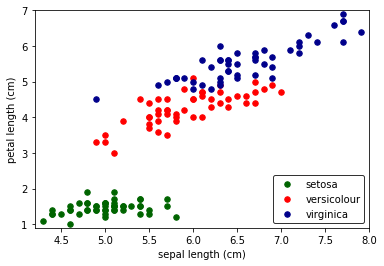

In [0]:
# Load the Iris dataset (which is a python dictionary)
iris_dataset = load_iris()

# Fetch the desired columns and process the data
Y = iris_dataset['target']

# Select the 'RM' and 'LSTAT' columns from the dataset
used_features = ['sepal length (cm)', 'petal length (cm)']
data_col = list()
for col, val in enumerate(iris_dataset['feature_names']):
    if(val in used_features):
        data_col.append(col)

X = iris_dataset['data'][:,data_col]

# Split into train and test sets
random_seed = np.random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

# Printing shape of data
print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('Y_test.shape: {}'.format(Y_test.shape))

# Plot the data
plot_iris_dataset(X, Y, x_label=used_features[0], y_label=used_features[1]);

#### Estimate the parameters of the Naive Bayes classifier

We assume that $p(x_i|Y = c) \sim ~\mathcal{N}(x_i|\mu_{ic},\sigma_{ic}^2)$ and estimate the parameters from training data.

In our exercise we have:

* $3$ class labels: Setosa, Versicolor, Virginica which we label as $Y \in \{0,1,2\}$
* $2$ features: $x_1$ - sepal length and $x_2$ petal length 

For each feature, we calculate the estimated class mean, class variance and prior probability:

 * Mean: $\mu_{x_1|y=0}$, $\mu_{x_1|y=1}$, $\mu_{x_1|y=2}$, $\mu_{x_2|y=0}$, $\mu_{x_2|y=1}$, $\mu_{x_2|y=2}$
 * Variance: $\sigma^2_{x_1|y=0}$, $\sigma^2_{x_1|y=1}$, $\sigma^2_{x_1|y=2}$, $\sigma^2_{x_2|y=0}$, $v_{x_2|y=1}$, $\sigma^2_{x_2|y=2}$
 * Prior: $p(y=0)$, $p(y=1)$, $p(y=2)$
 
For a query point $(x_1,x_2)$, we make decisions by computing:

$$
\begin{align}
g(X) & = \text{argmax}_Y \prod_{i=1}^2 p(x_i|Y)p(Y) \\
& = \text{argmax}_Y \{p(x_1|Y)p(Y)\cdot p(x_2|Y)p(Y)\}\\
& = \text{argmax}_Y \mathcal{N}(x_1|\mu_{x_1|Y},\sigma^2_{x_1|Y})p(Y)\cdot \mathcal{N}(x_2|\mu_{x_2|Y},\sigma^2_{x_2|Y})p(Y)
\end{align}
$$

The calculation is repeated for each class and query point is assigned to the class with highest value.

Write a function that predicts the class of a query point using the Gaussian Naive Bayes classifier.

In [0]:
# Import the normal distribution
from scipy.stats import norm

# Predicts the class of X using the Gaussian Naive Bayes classifier    
def predict_NB_gaussian_class(X, mu_list, std_list, pi_list): 
    # Your code starts here

    # Your code starts here

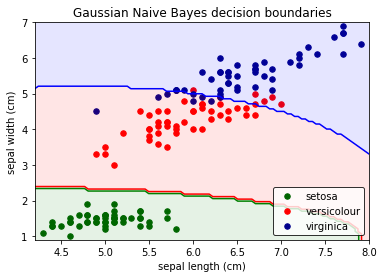

In [0]:
#Estimating the parameters 
setosa_indx = Y_train == 0
versicolour_indx = Y_train == 1
virginica_indx = Y_train == 2
specied_indx = [setosa_indx, versicolour_indx, virginica_indx]
mu_list = list()
std_list = list()

for val in specied_indx:
    mu_list.append(np.mean(X_train[val, :], axis=0))
    std_list.append(np.std(X_train[val, :], axis=0))

N = X_train.shape[0]
prior_list = [X_train[setosa_indx, :].shape[0] / N, X_train[versicolour_indx, :].shape[0] / N, X_train[virginica_indx, :].shape[0] / N]    

# Create a 2-D mesh grid of points
num_points = 100
x_mesh = np.linspace(4, 8, num_points)
y_mesh = np.linspace(0.5, 7.5, num_points)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)

# Computing the predicted class function for each value on the grid
Z = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, prior_list) 
                     for xx, yy in zip(np.ravel(x_mesh), np.ravel(y_mesh)) ] )


# Reshaping the predicted class into the meshgrid shape
z_mesh = Z.reshape(x_mesh.shape)

#Plot the filled and boundary contours
plt = plot_iris_dataset(X, Y);

plt.contourf( x_mesh, y_mesh, z_mesh, 2, alpha = .1, colors = ('green','red', 'blue'))
plt.contour( x_mesh, y_mesh, z_mesh, 2, alpha = 1, colors = ('green','red', 'blue'))

# Addd axis and title
plt.title('Gaussian Naive Bayes decision boundaries');

#### Compute the accuracy of the Naive Bayes classifier on train and test sets

In [0]:
y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, prior_list) 
                     for xx, yy in zip(np.ravel(X_train[:,0]), np.ravel(X_train[:,1])) ] )
print('Training Accuracy of the classifier: {0}%'.format(np.sum(y_pred==Y_train) / y_pred.shape[0] * 100))

y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, prior_list) 
                     for xx, yy in zip(np.ravel(X_test[:,0]), np.ravel(X_test[:,1])) ] )
print('Testing Accuracy of the classifier: {0}%'.format(np.sum(y_pred==Y_test) / y_pred.shape[0] * 100))

Training Accuracy of the classifier: 91.42857142857143%
Testing Accuracy of the classifier: 88.88888888888889%
